<a href="https://colab.research.google.com/github/sanulisiya/Telco-churn-prediction20231263/blob/main/Machine_Learning_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
# ============================
# Standard Data Manipulation
# ============================
import pandas as pd
import numpy as np

# ============================
# Visualization Libraries
# ============================
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# ============================
# Scikit-learn (Task 2)
# ============================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score
)
from sklearn.tree import DecisionTreeClassifier

# ============================
# TensorFlow / Keras (Neural Network)
# ============================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ============================
# Ignore Warnings for Cleaner Output
# ============================
import warnings
warnings.filterwarnings("ignore")

print("All libraries imported successfully!")


All libraries imported successfully!


Load the dataset


In [38]:
# Load the Telco Customer Churn dataset from GitHub
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Let's see what we loaded
print("Data set is Succesfully Loaded")
print("\nFirst 5 rows of the dataset:")
df.head()

Data set is Succesfully Loaded

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Inspection

In [3]:
# === DETAILED DATA INSPECTION ===

# 1. Check the data types and missing values
print("== DATASET INFO ==")
df.info()

== DATASET INFO ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

**Task 1**


Exploratory Data Analysis (EDA)

Missing Values

In [57]:
# Check missing values
missing = df.isnull().sum()

if missing.sum() == 0:
    print(" No missing values!")
else:
    missing_df = pd.DataFrame({
        'Missing': missing[missing > 0],
        'Percent': (missing[missing > 0] / len(df) * 100).round(2)
    })
    print(missing_df)

 No missing values!


Check for Duplicates

In [56]:
import pandas as pd

# Check for duplicate rows and calculate the percentage
duplicates = df.duplicated().sum()
duplicate_percentage = (duplicates / len(df)) * 100

print(f"\nTotal duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {duplicate_percentage:.2f}%")

if duplicates > 0:
    print("\nDuplicate rows found!")
    display(df[df.duplicated()].head())  # Display a few duplicate rows
else:
    print("No duplicate rows found!")



Total duplicate rows: 0
Percentage of duplicates: 0.00%
No duplicate rows found!


Numerical column Summery

In [39]:
# 3. Get statistical summary of numerical columns
print("== NUMERICAL COLUMNS STATISTICS ==")
df.describe()

== NUMERICAL COLUMNS STATISTICS ==


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Numerical Features Analysis

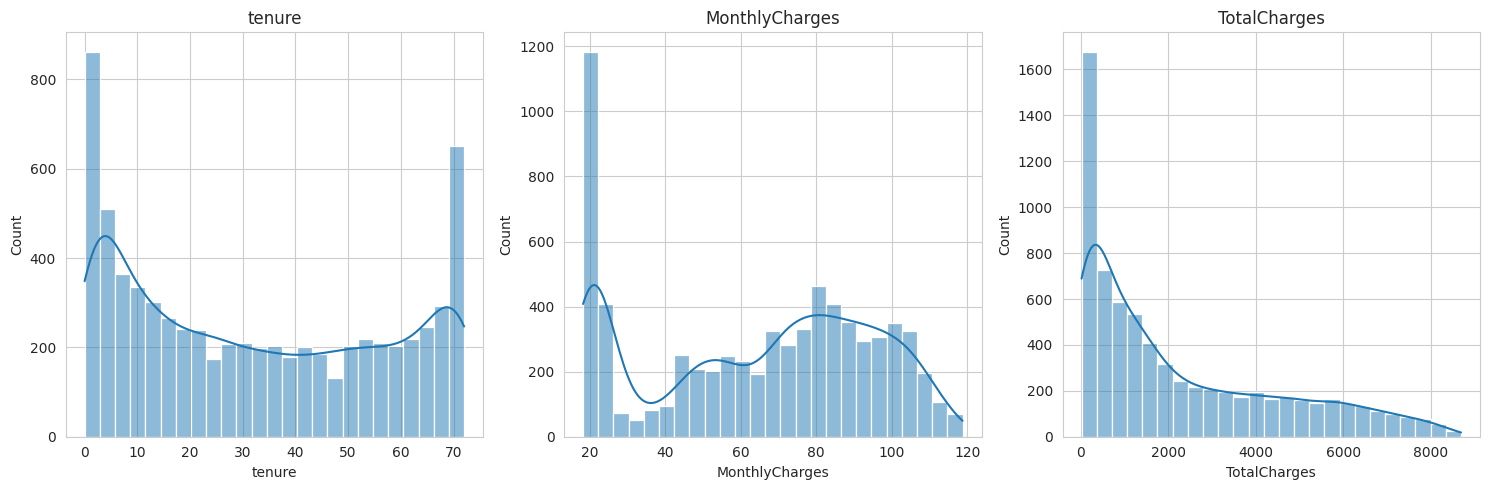

In [44]:
# Simple 3-feature histograms
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Convert TotalCharges if needed
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Plot all three
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(features):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], bins=25)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

BOXPLOTS OF NUMERICAL FEATURES

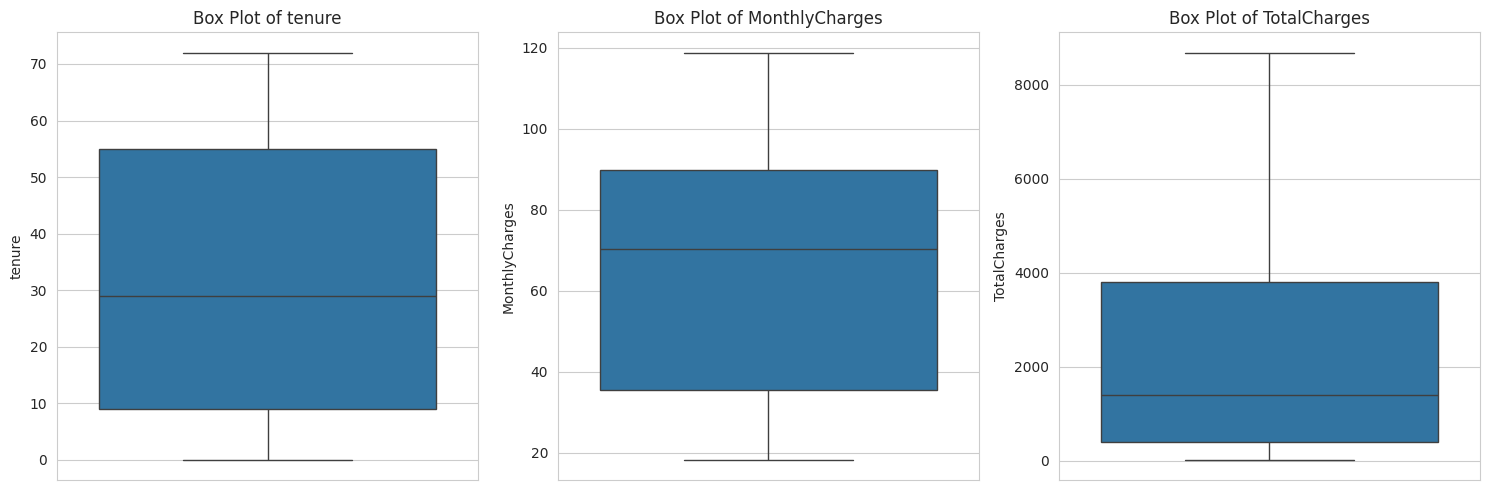

In [45]:
# BOX PLOTS FOR NUMERICAL FEATURES
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(num_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

Categorical Columns check

In [7]:
# 4. Check categorical columns
print("== CATEGORICAL COLUMNS ==")
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

# Show unique values in a few important categorical columns
print("\n== UNIQUE VALUES IN KEY CATEGORICAL COLUMNS ==")
print("Churn values:", df['Churn'].unique())
print("Contract types:", df['Contract'].unique())
print("Payment methods:", df['PaymentMethod'].unique())

== CATEGORICAL COLUMNS ==
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

== UNIQUE VALUES IN KEY CATEGORICAL COLUMNS ==
Churn values: ['No' 'Yes']
Contract types: ['Month-to-month' 'One year' 'Two year']
Payment methods: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Categorical Features Analysis

Distribution Without the Churn Split

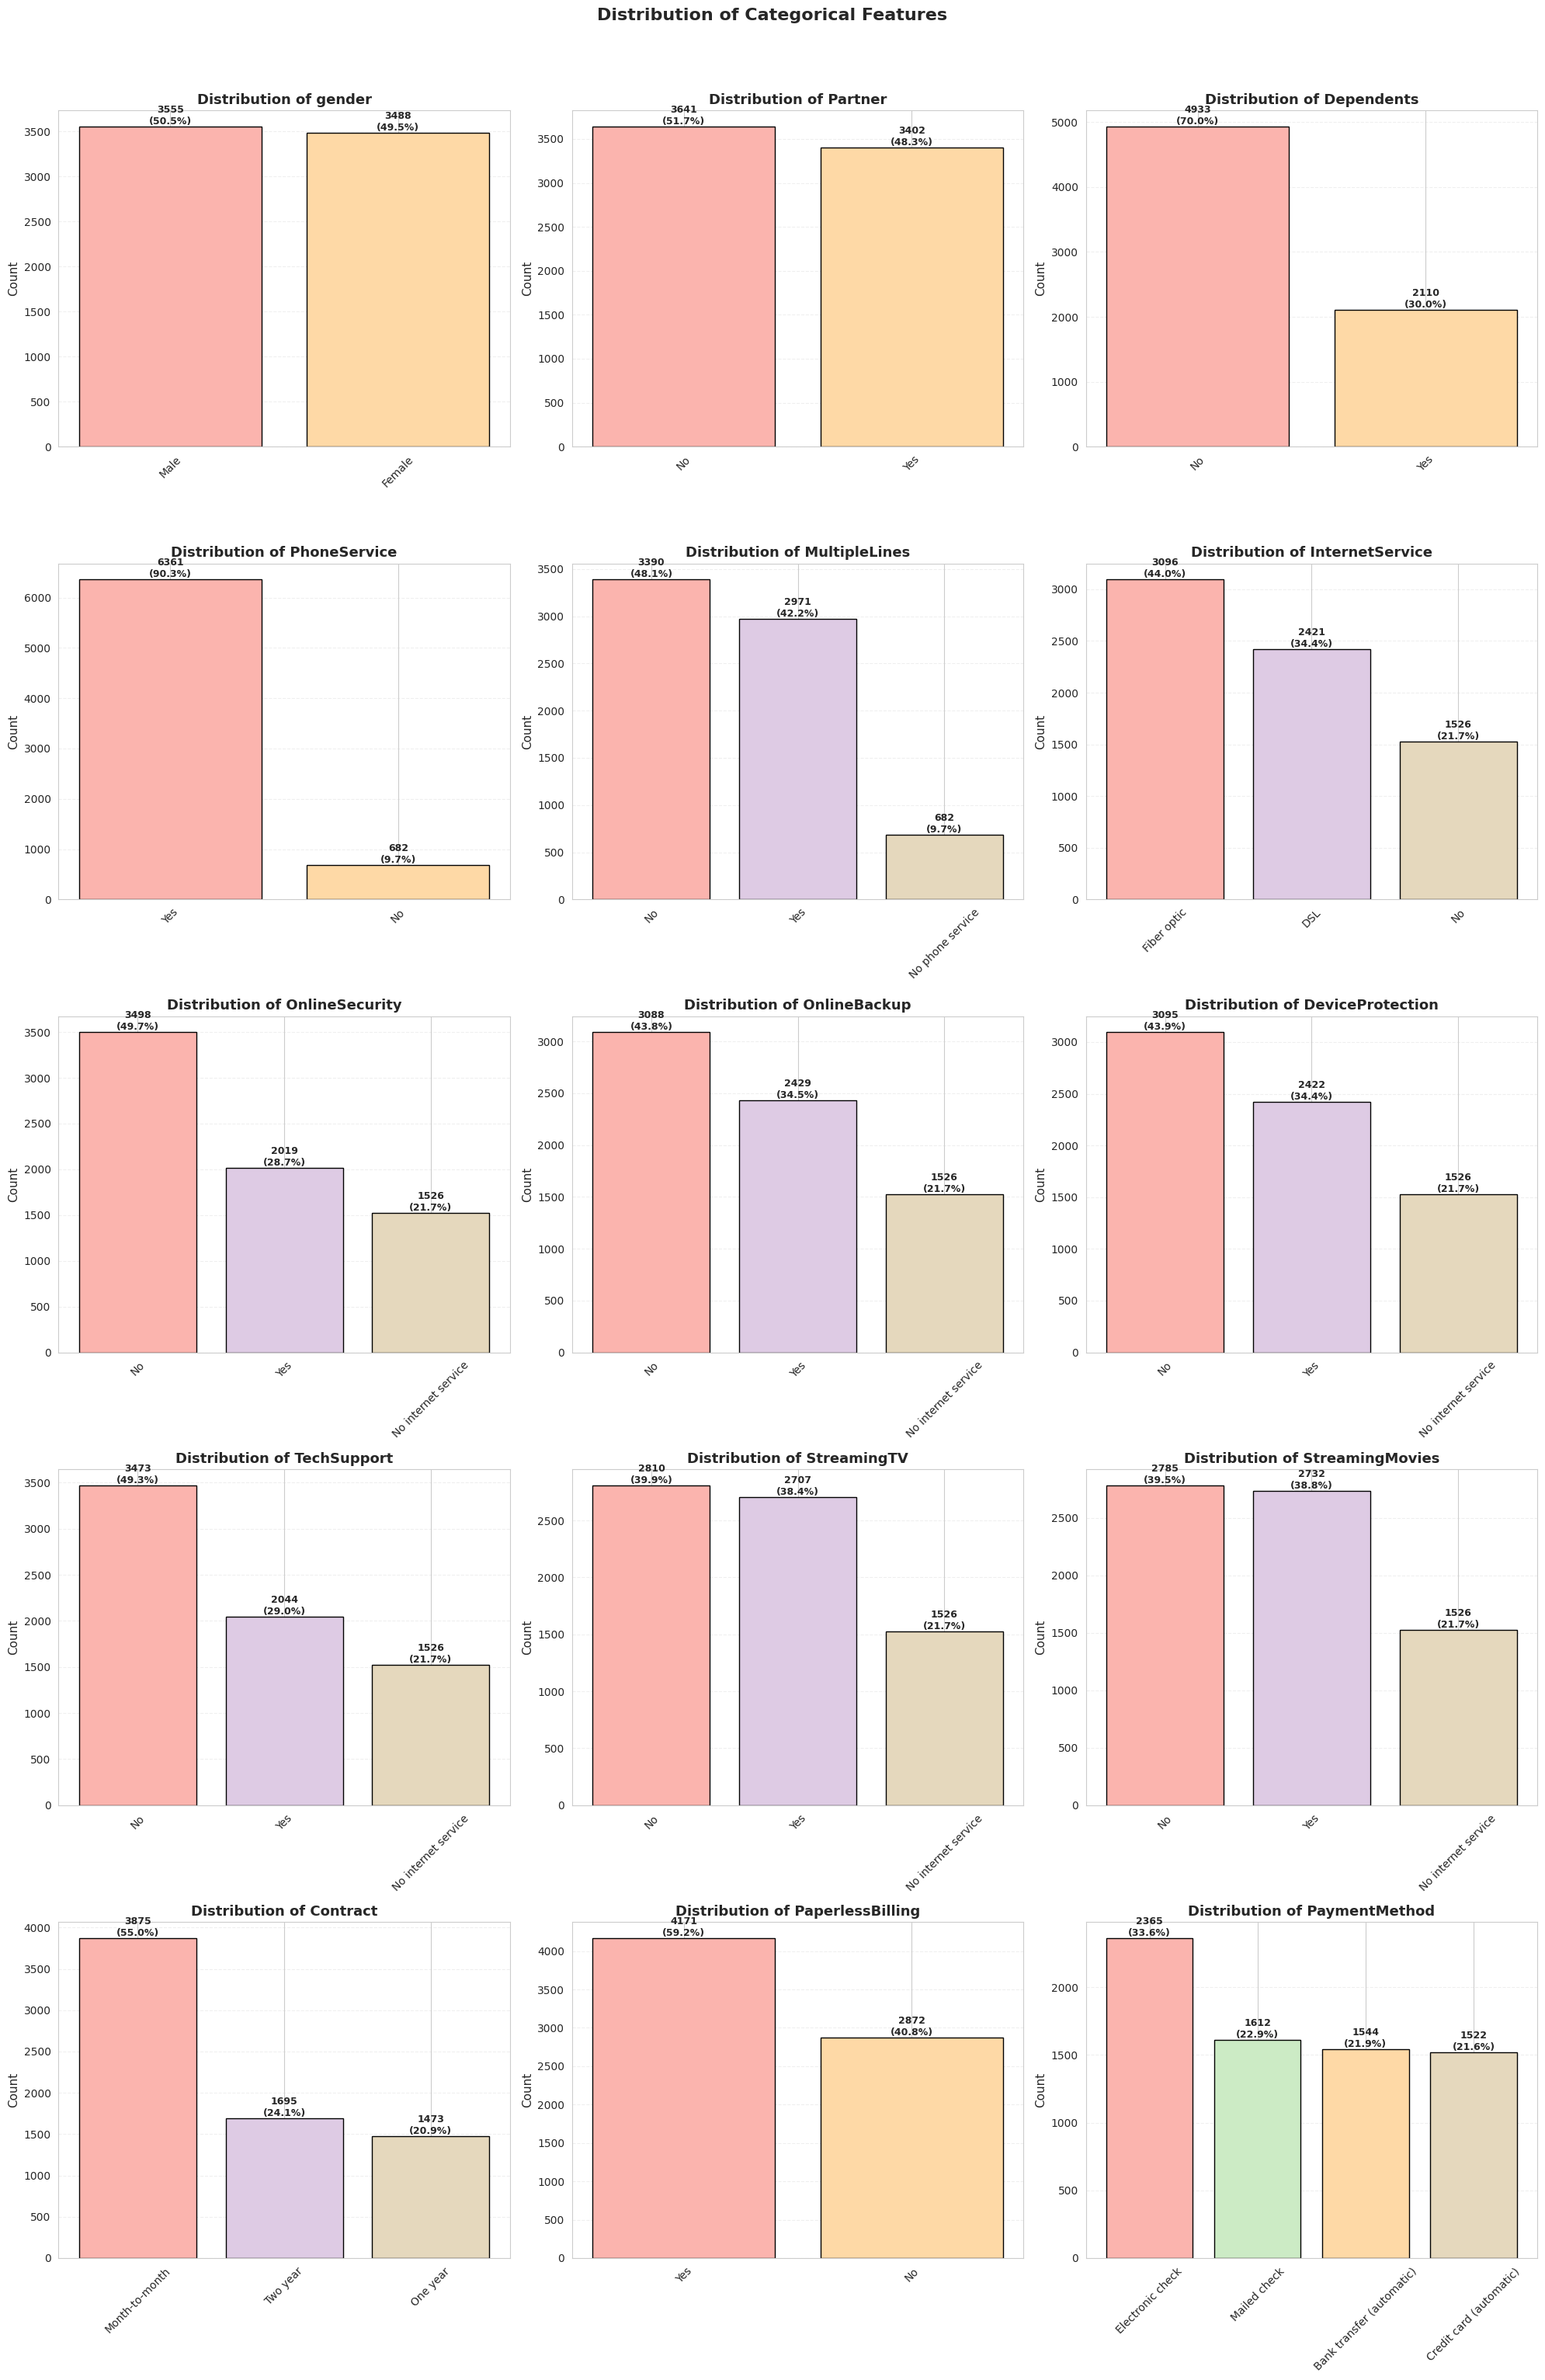

In [47]:
# Bar plots with percentages
cat_features = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

fig, axes = plt.subplots(5, 3, figsize=(20, 30))
axes = axes.flatten()

for idx, col in enumerate(cat_features):
    ax = axes[idx]

    # Get value counts and percentages
    counts = df[col].value_counts()
    percentages = (counts / len(df) * 100).round(1)

    # Create bar plot with better colors
    colors = plt.cm.Pastel1(np.arange(len(counts)) / len(counts))
    bars = ax.bar(counts.index, counts.values, color=colors, edgecolor='black')

    # Formatting
    ax.set_title(f'Distribution of {col}', fontsize=13, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=11)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    # Add count and percentage labels
    for i, (bar, count, percent) in enumerate(zip(bars, counts.values, percentages.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{count}\n({percent}%)', ha='center', va='bottom',
               fontsize=9, fontweight='bold')

plt.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

iDistribution Without the Churn Split

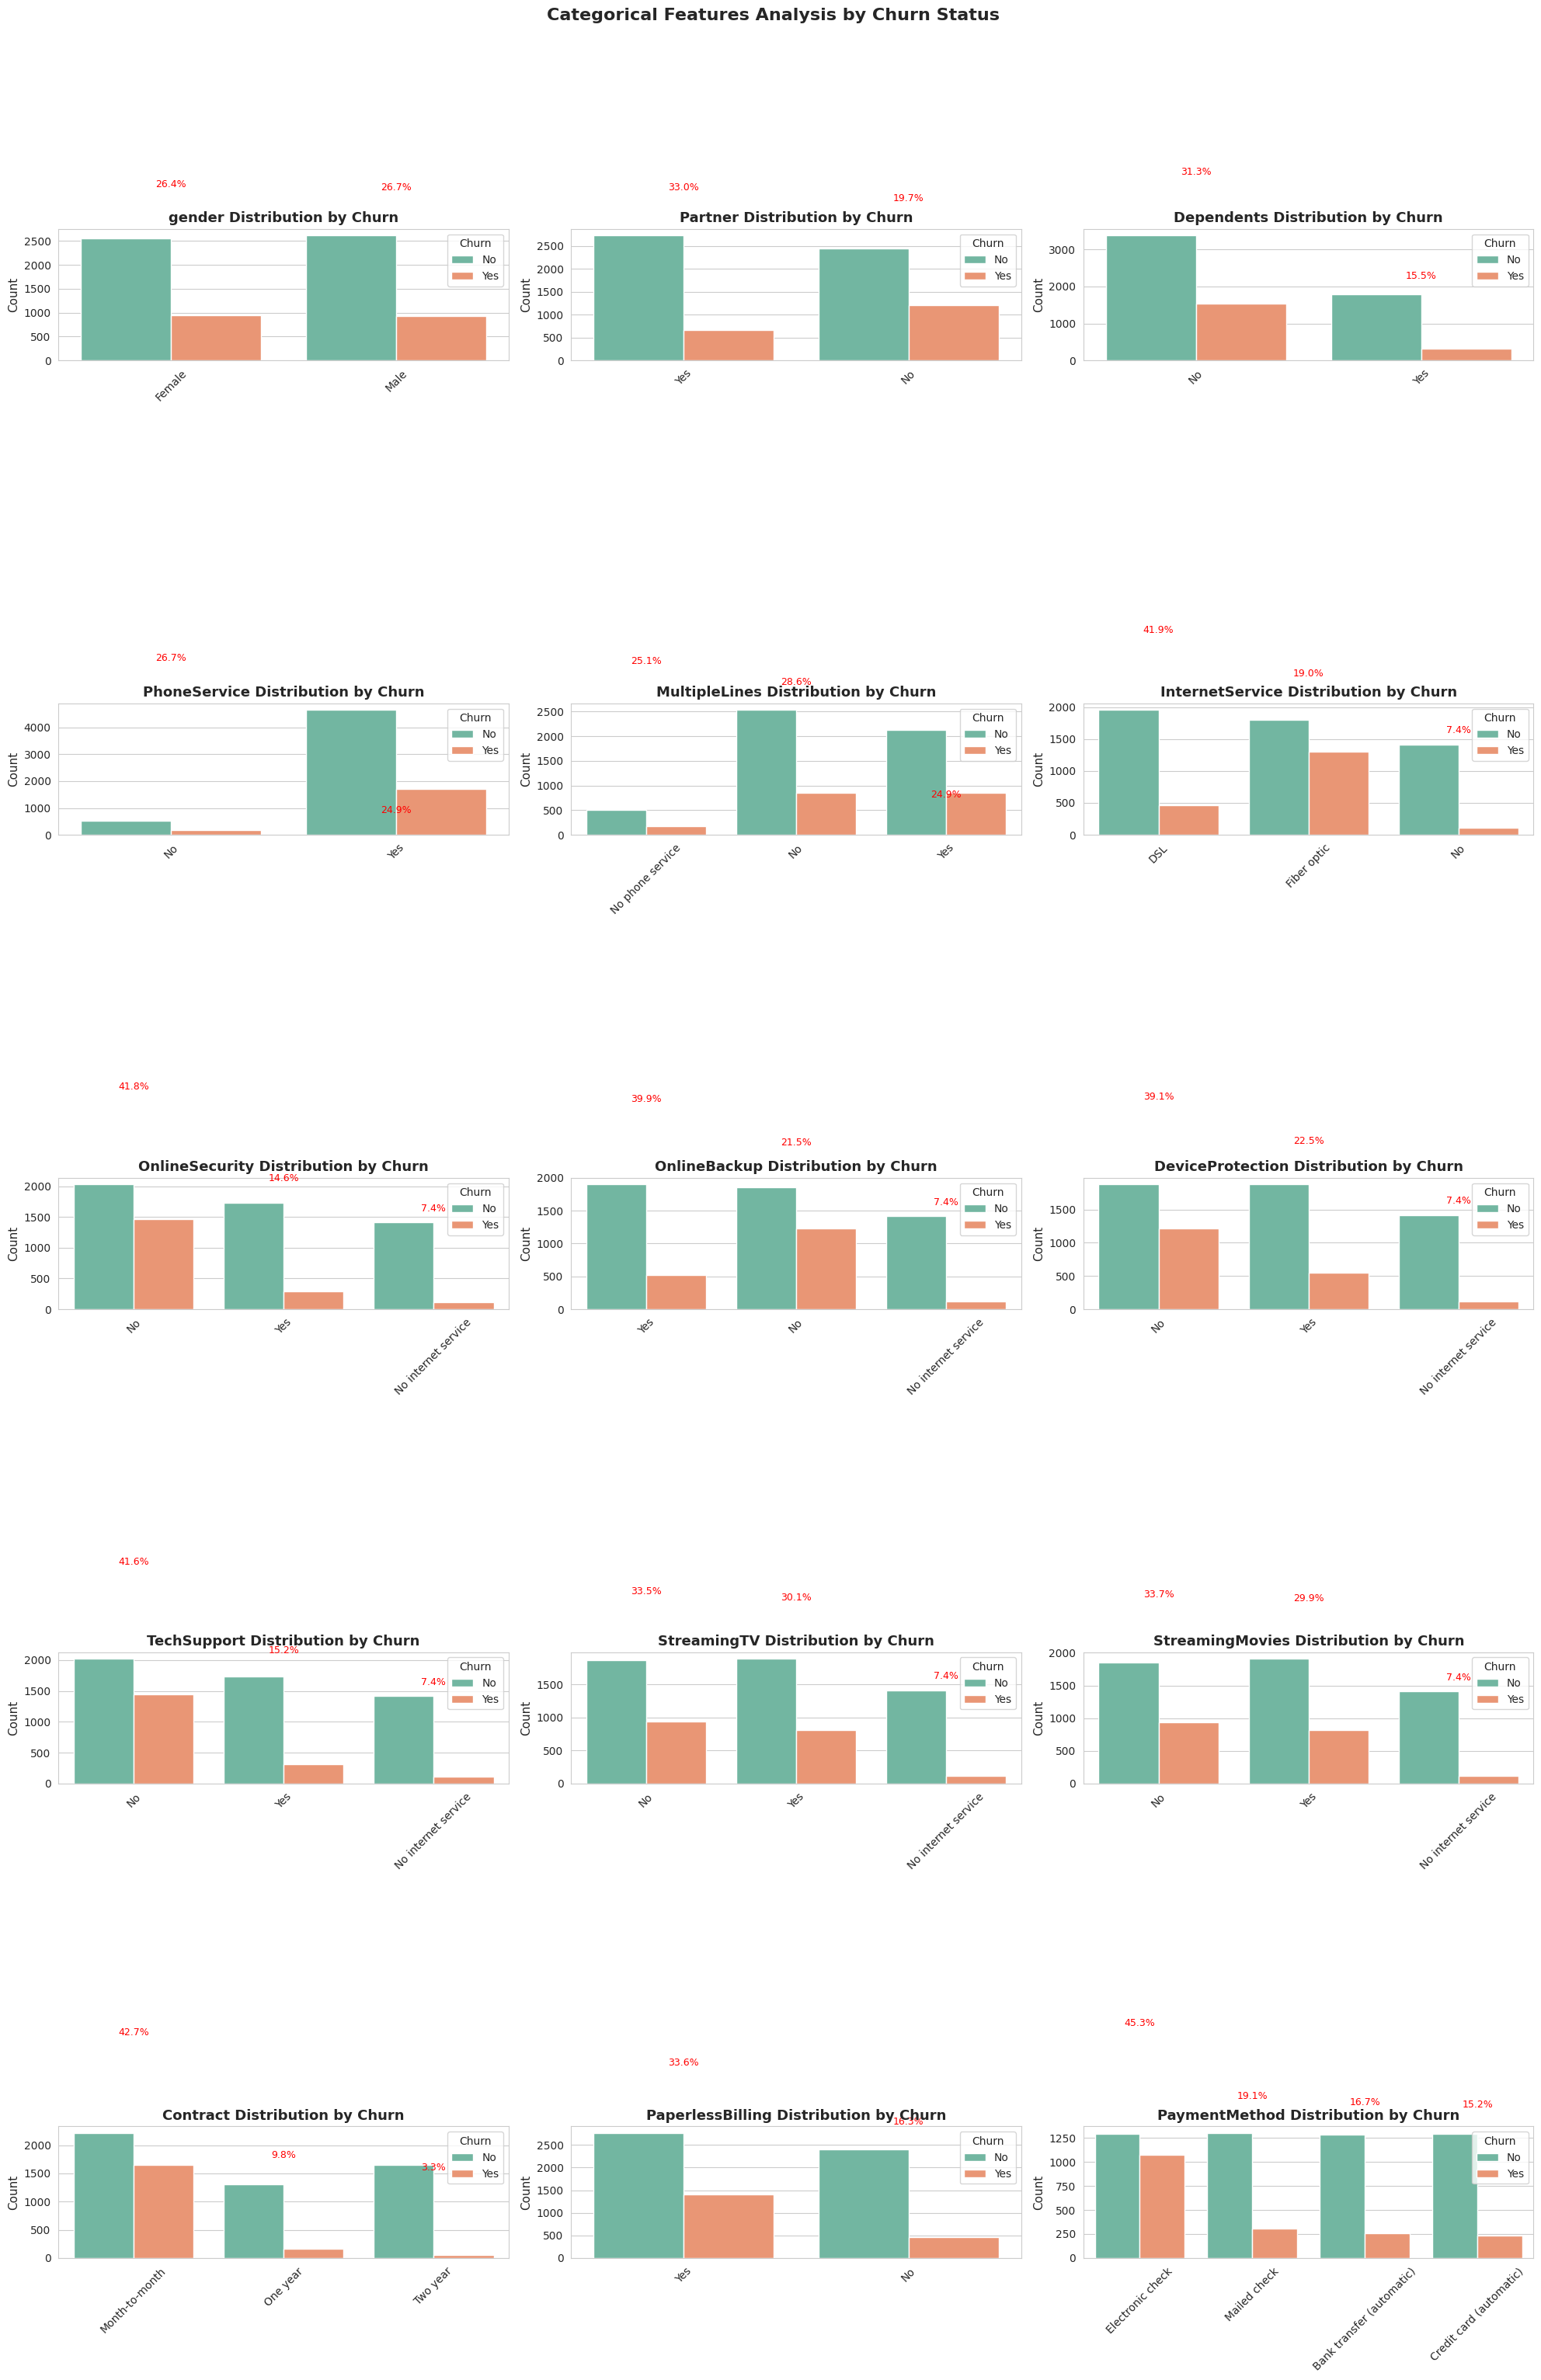

In [46]:
cat_features = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Create better layout (5 rows, 3 columns for 15 features)
fig, axes = plt.subplots(5, 3, figsize=(20, 30))
axes = axes.flatten()

for idx, col in enumerate(cat_features):
    # Create stacked bar plot
    ax = axes[idx]
    sns.countplot(data=df, x=col, hue='Churn', ax=ax, palette='Set2')

    # Formatting
    ax.set_title(f'{col} Distribution by Churn', fontsize=13, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=11)
    ax.tick_params(axis='x', rotation=45, labelsize=10)

    # Add percentage annotations
    total_counts = df[col].value_counts()
    churn_counts = df[df['Churn'] == 'Yes'][col].value_counts()

    # Add churn rate on top
    for i, (total, churn) in enumerate(zip(total_counts, churn_counts)):
        churn_rate = (churn / total) * 100
        ax.text(i, total + max(total_counts)*0.02,
               f'{churn_rate:.1f}%', ha='center', fontsize=9, color='red')

plt.suptitle('Categorical Features Analysis by Churn Status', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Pairplot the Numerical Columns

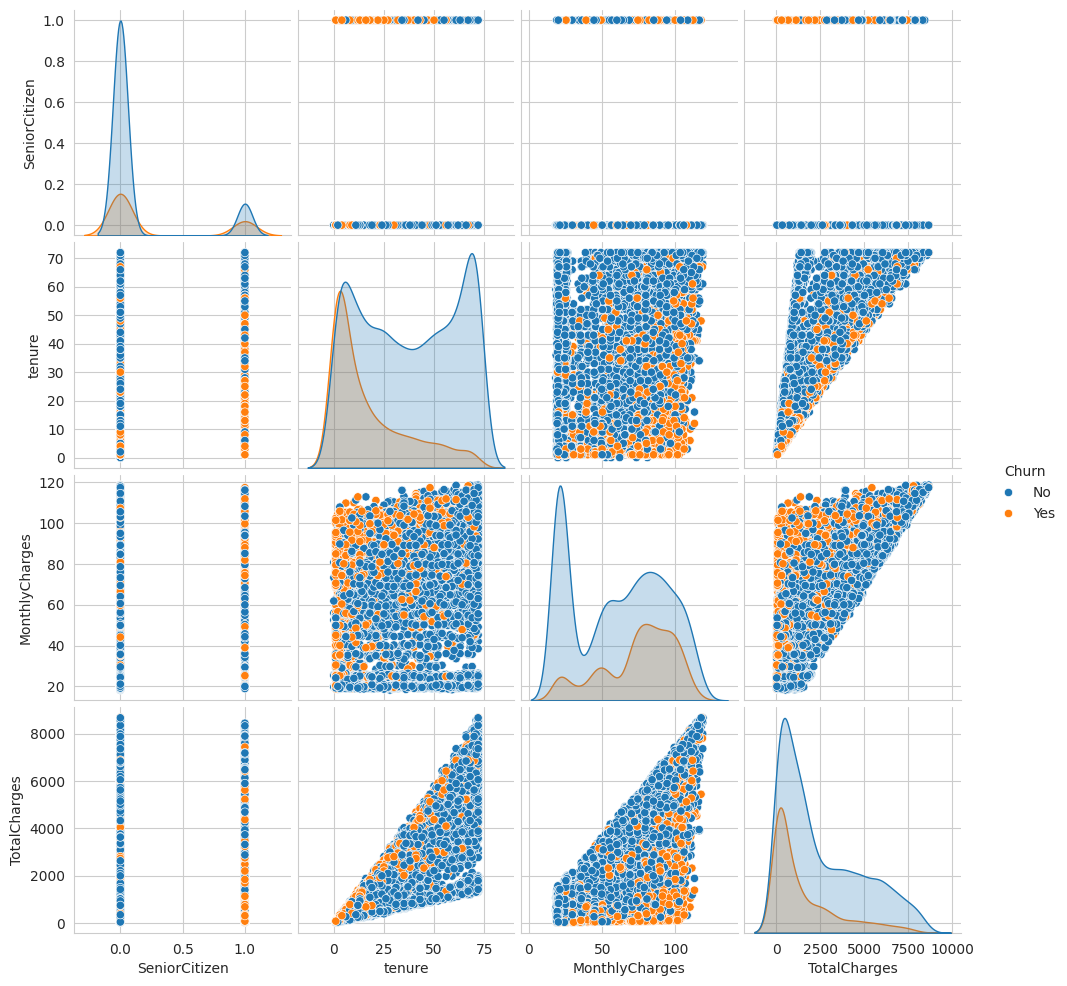

<Figure size 640x480 with 0 Axes>

In [51]:
# Select numerical columns for pairplot
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create pairplot with Churn as hue
sns.pairplot(df, hue='Churn')
plt.show()
plt.suptitle('Pairplot of Numerical Features by Churn Status',
             y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Data Cleaning

In [9]:
# Before conversion: show problem rows
print("\nSample TotalCharges values (first 10):")
print(df["TotalCharges"].head(10).tolist())

# Convert TotalCharges to numeric, coercing errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print("\nAfter conversion, NaNs in TotalCharges:", df["TotalCharges"].isna().sum())

# Show rows with NaN TotalCharges
if df["TotalCharges"].isna().sum() > 0:
    print("\nRows with missing TotalCharges (will display up to 10):")
    display(df[df["TotalCharges"].isna()].head(10))

# In original dataset there are 11 rows with blank TotalCharges (very small fraction)
df_clean = df.dropna(subset=["TotalCharges"]).copy()
print("\nShape after dropping rows with missing TotalCharges:", df_clean.shape)



Sample TotalCharges values (first 10):
[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5, 1949.4, 301.9, 3046.05, 3487.95]

After conversion, NaNs in TotalCharges: 11

Rows with missing TotalCharges (will display up to 10):


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No



Shape after dropping rows with missing TotalCharges: (7032, 21)


Convert Total Charges to numeirc

In [54]:
# Show DataFrame info
print("DATAFRAME INFO")
print("=" * 50)
print(f"Class: {type(df)}")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print()

# Show columns and data types
print("COLUMNS SUMMARY:")
print("-" * 40)
for i, col in enumerate(df.columns):
    dtype = df[col].dtype
    non_null = df[col].count()
    print(f"{i:2}. {col:20} {non_null:>6} non-null   {str(dtype):>10}")

DATAFRAME INFO
Class: <class 'pandas.core.frame.DataFrame'>
Shape: 7043 rows, 21 columns

COLUMNS SUMMARY:
----------------------------------------
 0. customerID             7043 non-null       object
 1. gender                 7043 non-null       object
 2. SeniorCitizen          7043 non-null        int64
 3. Partner                7043 non-null       object
 4. Dependents             7043 non-null       object
 5. tenure                 7043 non-null        int64
 6. PhoneService           7043 non-null       object
 7. MultipleLines          7043 non-null       object
 8. InternetService        7043 non-null       object
 9. OnlineSecurity         7043 non-null       object
10. OnlineBackup           7043 non-null       object
11. DeviceProtection       7043 non-null       object
12. TechSupport            7043 non-null       object
13. StreamingTV            7043 non-null       object
14. StreamingMovies        7043 non-null       object
15. Contract               7043 non-null  

Target Variable Distribution

In [58]:
# 5. Check the target variable distribution
print("== TARGET VARIABLE DISTRIBUTION (CHURN) ==")
churn_distribution = df['Churn'].value_counts()
print(churn_distribution)

# Calculate percentages
print("\n== CHURN PERCENTAGES ==")
churn_percentages = df['Churn'].value_counts(normalize=True) * 100
print(churn_percentages)

== TARGET VARIABLE DISTRIBUTION (CHURN) ==
Churn
No     5174
Yes    1869
Name: count, dtype: int64

== CHURN PERCENTAGES ==
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


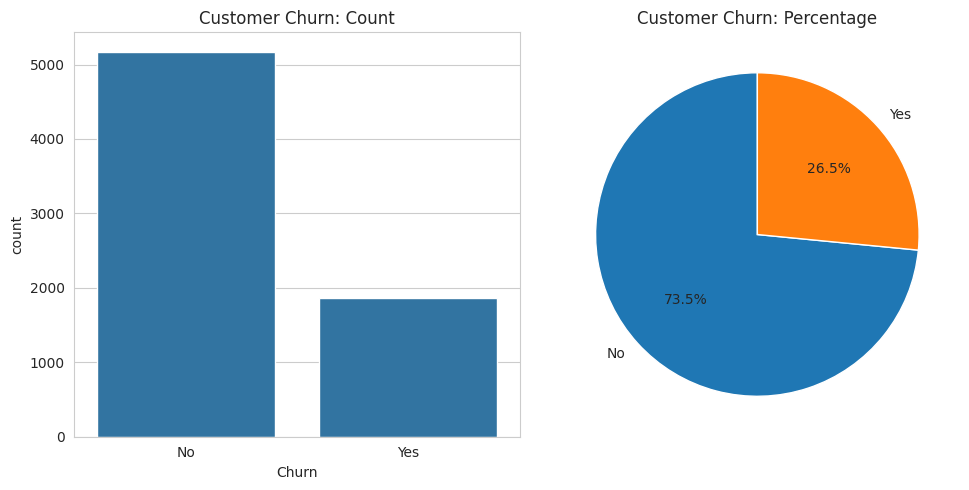

Customers who DID NOT churn: 5174 (73.5%)
Customers who CHURNED: 1869 (26.5%)


In [59]:
 #=== VISUALIZE CHURN DISTRIBUTION ===
plt.figure(figsize=(10, 5))

# First subplot - Count plot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Churn')
plt.title('Customer Churn: Count')

# Second subplot - Pie chart
plt.subplot(1, 2, 2)
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn: Percentage')

plt.tight_layout()
plt.show()

# Print the exact numbers
print(f"Customers who DID NOT churn: {churn_counts['No']} ({churn_counts['No']/len(df)*100:.1f}%)")
print(f"Customers who CHURNED: {churn_counts['Yes']} ({churn_counts['Yes']/len(df)*100:.1f}%)")

Percentage Bar

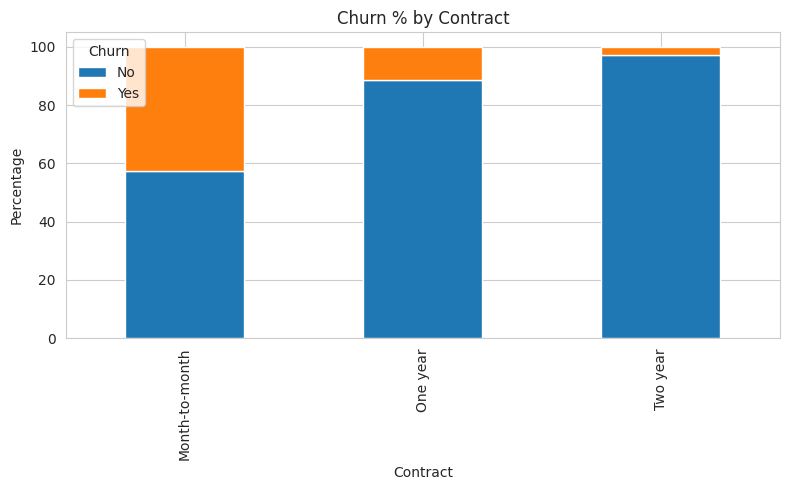

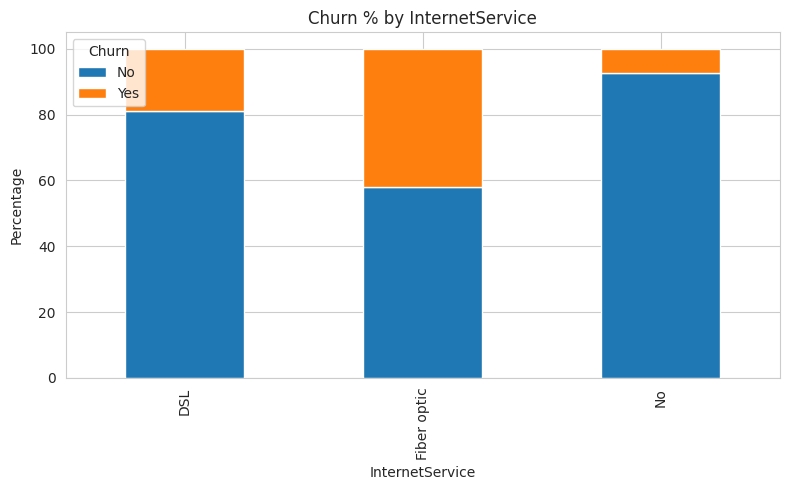

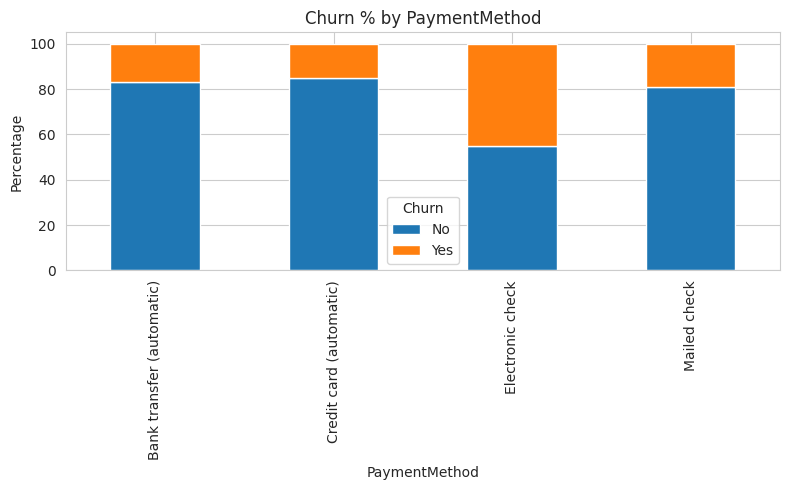

In [15]:
# ------------- Stacked percentage bar (churn rate per category) -------------
def stacked_percent_bar(col):
    ct = pd.crosstab(df_clean[col], df_clean["Churn"], normalize="index")*100
    ct = ct[["No","Yes"]] if "No" in ct.columns and "Yes" in ct.columns else ct
    ct.plot(kind="bar", stacked=True, figsize=(8,5))
    plt.legend(title="Churn")
    plt.ylabel("Percentage")
    plt.title(f"Churn % by {col}")
    plt.tight_layout()
    plt.show()

stacked_percent_bar("Contract")
stacked_percent_bar("InternetService")
stacked_percent_bar("PaymentMethod")

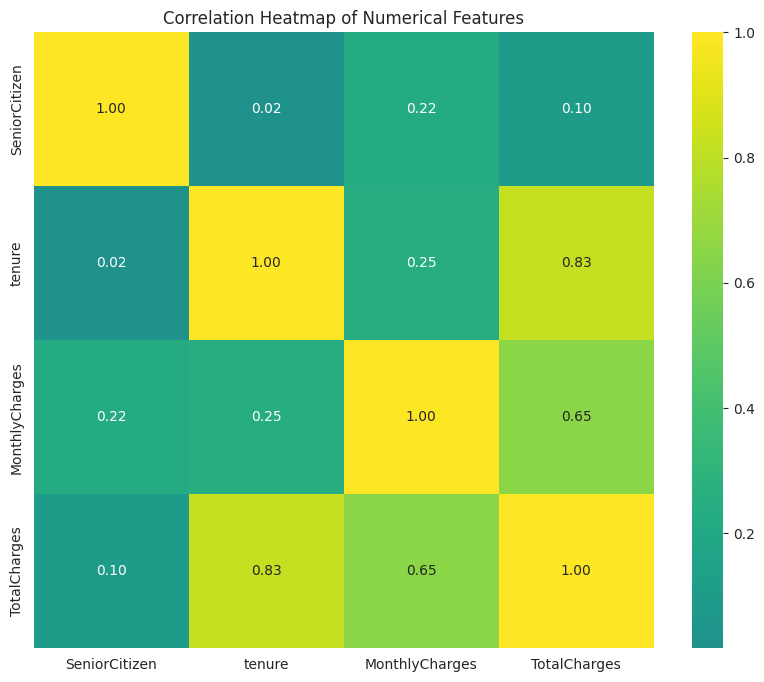

In [18]:
# === CORRELATION BETWEEN NUMERICAL FEATURES ===
plt.figure(figsize=(10, 8))

# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", center=0, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Feature Importance Visualization

In [62]:
# === DATA QUALITY CHECK ===
print("== DATA QUALITY SUMMARY ==")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Check for any whitespace or strange values in categorical columns
print("\n=== CHECKING FOR DATA ISSUES ===")
for col in df.select_dtypes(include=['object']).columns:
    if col != 'customerID':  # Skip customer ID
        unique_vals = df[col].unique()
        print(f"{col}: {len(unique_vals)} unique values")
        if len(unique_vals) < 10:  # Only show if not too many values
            print(f"   Values: {unique_vals}")

== DATA QUALITY SUMMARY ==
Total missing values: 0
Duplicate rows: 0

=== CHECKING FOR DATA ISSUES ===
gender: 2 unique values
   Values: ['Female' 'Male']
Partner: 2 unique values
   Values: ['Yes' 'No']
Dependents: 2 unique values
   Values: ['No' 'Yes']
PhoneService: 2 unique values
   Values: ['No' 'Yes']
MultipleLines: 3 unique values
   Values: ['No phone service' 'No' 'Yes']
InternetService: 3 unique values
   Values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
OnlineBackup: 3 unique values
   Values: ['Yes' 'No' 'No internet service']
DeviceProtection: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
TechSupport: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
StreamingTV: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
StreamingMovies: 3 unique values
   Values: ['No' 'Yes' 'No internet service']
Contract: 3 unique values
   Values: ['Month-to-month' 'One year' 'Two year']
Pap

In [63]:
# Key Insights Summary
print("KEY INSIGHTS")
print("=" * 40)

# 1. Overall churn
churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"1. Overall churn rate: {churn_rate:.1f}%")

# 2. Churn by contract
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\n2. Churn by contract type:")
for contract, rate in contract_churn.sort_values().items():
    print(f"   {contract}: {rate:.1f}%")

# 3. Tenure difference
tenure_diff = df.groupby('Churn')['tenure'].mean()
print(f"\n3. Average tenure:")
print(f"   Churned: {tenure_diff['Yes']:.1f} months")
print(f"   Stayed: {tenure_diff['No']:.1f} months")

# 4. Monthly charges difference
charges_diff = df.groupby('Churn')['MonthlyCharges'].mean()
print(f"\n4. Average monthly charges:")
print(f"   Churned: ${charges_diff['Yes']:.2f}")
print(f"   Stayed: ${charges_diff['No']:.2f}")

📊 KEY INSIGHTS
1. Overall churn rate: 26.5%

2. Churn by contract type:
   Two year: 2.8%
   One year: 11.3%
   Month-to-month: 42.7%

3. Average tenure:
   Churned: 18.0 months
   Stayed: 37.6 months

4. Average monthly charges:
   Churned: $74.44
   Stayed: $61.27


Task **2**

Data pre prosseing

Drop Unsessary Columns (Customer ID)

In [65]:
# Drop the 'customerID' column if it exists
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Verify
print(df.head())


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

Binary Encoding

Endcode Target Veriable

In [66]:
# Encode target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
print(" Target variable encoded (Yes=1, No=0)")

 Target variable encoded (Yes=1, No=0)


In [87]:
binary = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Encode binary features
for col in binary:
    df[col] = df[col].map({
        'Yes': 1, 'No': 0,
        'Male': 0, 'Female': 1
    })

print(" Binary features successfully encoded (Yes/No and Male/Female converted to 0/1).")


 Binary features successfully encoded (Yes/No and Male/Female converted to 0/1).


One-Hot Endoding

In [81]:
multi_class_features = ['Contract', 'PaymentMethod', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df = pd.get_dummies(df, columns=multi_class_features,drop_first=True)


df.apply(lambda x: x.unique())

,0
gender,[nan]
SeniorCitizen,"[0, 1]"
Partner,[nan]
Dependents,[nan]
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
PhoneService,[nan]
PaperlessBilling,[nan]
MonthlyCharges,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,..."
TotalCharges,"[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5..."
Churn,"[0, 1]"


Feature Scalling

In [84]:
feature_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[feature_scaling] = scaler.fit_transform(df[feature_scaling])


NameError: name 'MinMaxScaler' is not defined

Separate data into Featrues

In [85]:
X = df.drop('Churn', axis=1)
Y = df['Churn']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42,)


Class imbalance handling (Using Smote)

In [86]:
print("Original training class distribution:", np.bincount(Y_train))
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)


Original training class distribution: [4138 1496]


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Model** **Training**

Decsision Tree

Baseline Decsision Tree Model

Visulaize basic D **Tree**

Hyper Parameter tuning

Pruning tuning for Decsison tree

Evaluate Decssion Tree

Visulaize Tuned D Tree

ROC Curve

Confusion Matrix

Data loss curves

Nurel Network Model

Baseline Nurel Netowrk Model

Hyperparameter tuning (using keras tuner)

Tuned Nurel Network Model